In [9]:
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('data/01.jpg',cv.IMREAD_GRAYSCALE)
img2 = cv.imread('data/02.jpg',cv.IMREAD_GRAYSCALE)

### scale

In [10]:
scale_percent = 60 # percent of original size
width = int(img1.shape[1] * scale_percent / 100)
height = int(img1.shape[0] * scale_percent / 100)

dim = (width, height)
img1 = cv.resize(img1, dim, interpolation = cv.INTER_AREA)
img2 = cv.resize(img2, dim, interpolation = cv.INTER_AREA)

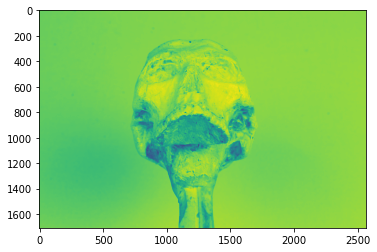

In [11]:
plt.imshow(img1)

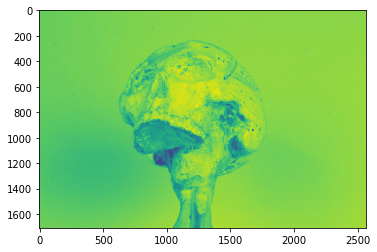

In [12]:
plt.imshow(img2)

In [14]:
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [15]:
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

(<matplotlib.image.AxesImage at 0x12a3a9970>,)

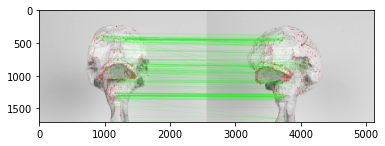

In [16]:
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),